# A (typical) architecture of a convolutional neural network

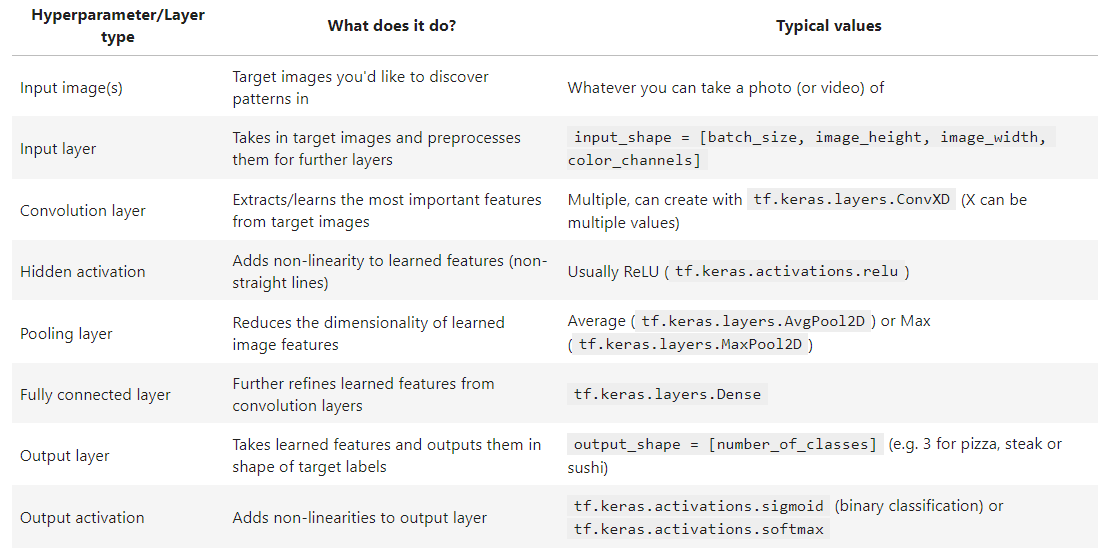

**Note**:

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

A baseline is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

# Get the data and reference


A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

**Note:**

To get the data, follow this link for reference

* [How to Download and inspect a dataset](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb)

# Data Image Preprocessing

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed for reproducibility (ensures results are consistent)
tf.random.set_seed(42)

# Preprocess training data by scaling pixel values to the range [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255)

# Preprocess validation data by scaling pixel values to the range [0, 1]
valid_datagen = ImageDataGenerator(rescale=1./255)

# Define the directories where the training and testing data are located
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),  # Resize images to 224x224 pixels
                                                                  batch_size=32,  # Process 32 images at a time
                                                                  class_mode='binary',  # Binary classification problem
                                                                  shuffle=True)  # Shuffle data (default behavior)

# Load and preprocess the validation data from the directory
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,  # Process 32 images at a time
                                               target_size=(224, 224),  # Resize all images to 224x224 pixels
                                               class_mode="binary",  # Binary classification problem
                                               seed=42)  # Seed for reproducibility

 **Note**: many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

#CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout  # Import Dropout layer

# Define the CNN model
model_cnn = tf.keras.models.Sequential([

    # First convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and input shape for 224x224x3 images
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),  # 3x3 window to scan the image
                           input_shape=(224, 224, 3),  # Input shape for 224x224 color images
                           activation='relu'),  # ReLU activation to introduce non-linearity

    # Max pooling layer with 2x2 pool size to reduce dimensionality
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),  # Max pooling to downsample feature maps
                                  padding="valid"),  # No padding, reducing the spatial dimensions

    # Second convolutional layer with 32 filters, 3x3 kernel size, ReLU activation
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),  # Another 3x3 window for further feature extraction
                           activation='relu'),  # ReLU activation to introduce non-linearity

    # Second max pooling layer with 2x2 pool size to further reduce dimensionality
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Another max pooling layer to downsample feature maps

    # Flatten the 3D feature maps into a 1D vector
    tf.keras.layers.Flatten(),  # Flatten the output of the convolutional layers to a 1D vector

    # Dense (fully connected) layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(units=128,
                          activation='relu'),  # ReLU activation for non-linearity

    # Dropout layer to prevent overfitting
    Dropout(rate=0.5),  # 50% of neurons will be dropped during training

    # Dense (fully connected) layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(units=128,
                          activation='relu'),  # ReLU activation for non-linearity

    # Dropout layer to prevent overfitting
    Dropout(rate=0.5),  # Another 50% of neurons will be dropped during training

    # Dense (fully connected) layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(units=128,
                          activation='relu'),  # ReLU activation for non-linearity

    # Output layer with 1 neuron and sigmoid activation for binary classification
    tf.keras.layers.Dense(units=1,
                          activation='sigmoid')  # Sigmoid activation to output probability for binary classification
])

# Compile the CNN model
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(),  # Adam optimizer for efficient training
                  loss='binary_crossentropy',  # Binary cross-entropy for binary classification
                  metrics=['accuracy'])  # Accuracy as the evaluation metric

# Train the CNN model
history = model_cnn.fit(train_data,  # Training data
                        epochs=5,  # Train for 5 epochs
                        steps_per_epoch=len(train_data),  # Number of steps per epoch
                        validation_data=valid_data,  # Validation data for evaluating the model during training
                        validation_steps=len(valid_data))  # Number of validation steps

In [ ]:
# Check out the model architecture
model_cnn.summary()

In [ ]:
# Evaluate on the test data
model_cnn.evaluate(test_data)

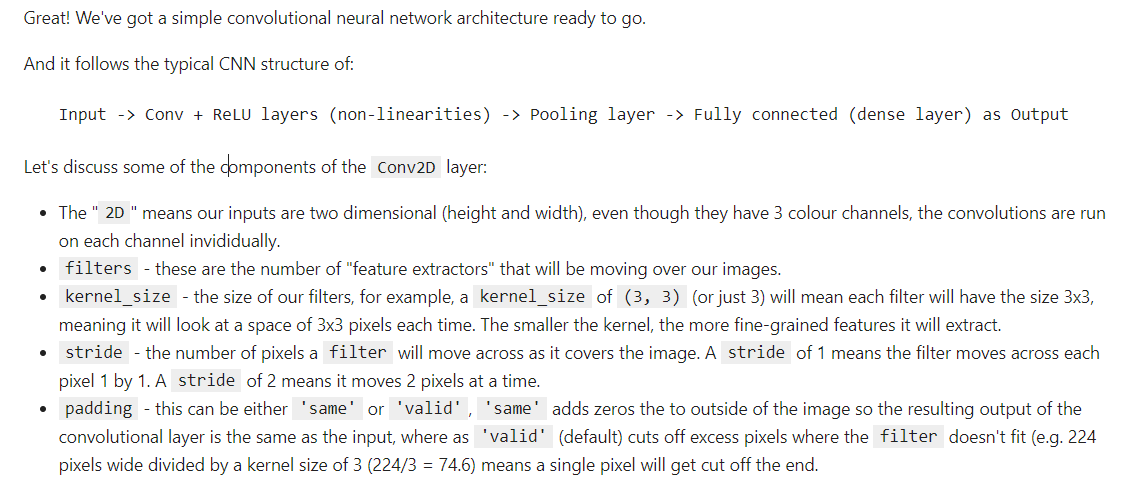

**What Is Padding**

padding is a technique used to preserve the spatial dimensions of the input image after convolution operations on a feature map. Padding involves adding extra pixels around the border of the input feature map before convolution.

**Notes:**

* **Valid Padding**: This is useful when we want to reduce the spatial dimensions of the feature maps.
* **Same Padding**: This is useful when we want to preserve the spatial dimensions of the feature maps.
* **A batch size of 32 is a commonly used** choice for training neural networks.
* **Adding extra layers or increasing the number of neurons** in each layer is often referred to as increasing the complexity of your model.

## Evaluate the model

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

**Note**:

* When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

* The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

# Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.
* Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

# Saving and loading our model


In [ ]:
# Save a model
model_cnn.save("saved_trained_model")

# Load in a model and evaluate it
model_cnn = tf.keras.models.load_model("saved_trained_model")
model_cnn.evaluate(test_data)